### Giới thiệu về Tạo Mô Tả Hình Ảnh

**Tạo Mô Tả Hình Ảnh** là một cách thú vị để máy tính mô tả hình ảnh bằng từ ngữ. Tương tự như khi chúng ta nhìn lướt qua một bức tranh và hiểu được những gì đang diễn ra, máy tính cũng có thể học cách làm điều tương tự!

Hãy tưởng tượng việc cho máy tính xem một bức ảnh của một chú mèo dễ thương. Tạo Mô Tả Hình Ảnh giống như một phép thuật giúp máy tính nói điều gì đó như: "Một chú mèo trắng xù đang ngồi trên bậu cửa sổ." Đó là sự kết hợp tuyệt vời giữa việc dạy máy tính hiểu hình ảnh và giao tiếp bằng ngôn ngữ giống như con người.

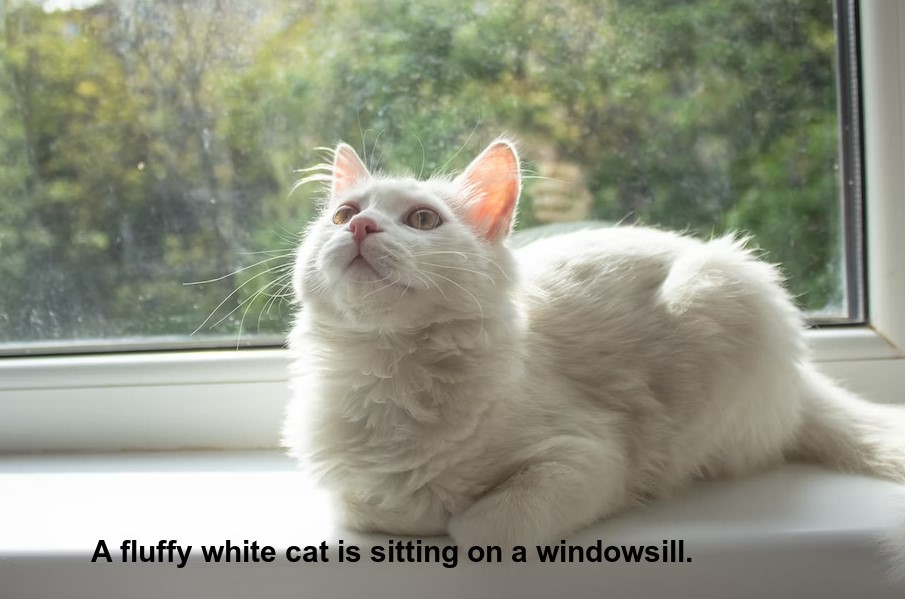

### Cách Hoạt Động

Hãy nghĩ về Tạo Mô Tả Hình Ảnh như là sự hợp tác giữa hai thành phần quan trọng trong "bộ não" của máy tính:

1. **Đôi mắt (Mạng Neural Tích Chập - CNNs):**
   Cũng như chúng ta có đôi mắt để nhìn, máy tính có CNNs để phân tích hình ảnh. Những mạng này giúp máy tính nhận diện các yếu tố quan trọng trong hình ảnh, chẳng hạn như tai hay đuôi của mèo. Những yếu tố quan trọng này được chuyển đổi thành một tập hợp các con số đặc biệt mà máy tính có thể hiểu được, gọi là "vector embedding".

2. **Cái miệng (Mạng Neural Tái Phát - RNNs):**
   "Cái miệng" của máy tính chính là RNN. Nó lấy những con số đặc biệt (vector embedding) từ CNN và kết hợp chúng với sức mạnh của từ ngữ. Nó giống như việc chúng ta dạy máy tính kể một câu chuyện về hình ảnh. RNN sẽ lấy từng từ một và bắt đầu hình thành một câu. Nó bắt đầu với "Xù xì", tiếp theo là "trắng", và cứ thế cho đến khi tạo ra một mô tả hoàn chỉnh.

### Tại Sao Nó Hấp Dẫn

Tạo Mô Tả Hình Ảnh giúp máy tính mô tả hình ảnh giống như con người. Điều này không chỉ nâng cao khả năng hiểu hình ảnh của máy tính mà còn giúp chúng giao tiếp bằng ngôn ngữ mô tả. Nếu bạn tò mò muốn xem sự hợp tác này trông như thế nào dưới dạng hình ảnh, hãy xem phần Mô Hình hóa!

# Import necessary modules

In [1]:
# Basic libraries
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from math import ceil
from collections import defaultdict
from tqdm.notebook import tqdm        # Progress bar library for Jupyter Notebook

# Deep learning framework for building and training models
import tensorflow as tf
## Pre-trained model for image feature extraction
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Tokenizer class for captions tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

## Function for padding sequences to a specific length
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Class for defining Keras models
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, concatenate, Bidirectional, Dot, Activation, RepeatVector, Multiply, Lambda

# For checking score
from nltk.translate.bleu_score import corpus_bleu

In [2]:
# Setting the input and output directory
# INPUT_DIR = '/kaggle/input/flickr8k'
# OUTPUT_DIR = '/kaggle/working'
INPUT_DIR = "../data/flickr8k"
OUTPUT_DIR = "../model" 


**Trích xuất đặc trưng từ hình ảnh (Image Features Extraction)** là một bước rất quan trọng trong việc xây dựng một mô hình tạo mô tả ảnh (image caption generator). Trong bước này, chúng ta sử dụng mô hình VGG16 đã được huấn luyện sẵn để trích xuất các đặc trưng quan trọng từ hình ảnh, giúp mô hình hiểu được nội dung trong ảnh.

### Tại sao lại chọn VGG16?

VGG16 là một mô hình mạng nơ-ron tích chập (Convolutional Neural Network - CNN) nổi tiếng, được phát triển bởi nhóm nghiên cứu Visual Geometry Group (VGG) tại Đại học Oxford. Mô hình này đã được huấn luyện trên tập dữ liệu ImageNet, bao gồm hàng triệu hình ảnh thuộc hàng ngàn loại đối tượng khác nhau. VGG16 đặc biệt hiệu quả trong việc trích xuất các đặc trưng từ hình ảnh nhờ vào cấu trúc đơn giản nhưng sâu với 16 lớp, cho phép nó nhận diện và hiểu các chi tiết từ đơn giản đến phức tạp.

### Hình ảnh và các đặc trưng

Khi một hình ảnh được đưa vào VGG16, mô hình này sẽ phân tích và trích xuất ra các đặc trưng như:
- **Đặc trưng đơn giản**: Các đường nét, góc cạnh, màu sắc.
- **Đặc trưng phức tạp**: Hình dạng của các đối tượng, kết cấu (texture), và cả các khái niệm cao hơn như tai nhọn của mèo, bộ lông mềm mại, hay bậu cửa sổ mà mèo đang ngồi.

Nhờ vào khả năng này, VGG16 giúp mô hình của chúng ta hiểu được những gì đang diễn ra trong hình ảnh. Khi kết hợp với mô tả văn bản (caption), mô hình sẽ có thể tạo ra những đoạn văn bản mô tả hình ảnh một cách tự nhiên và chính xác, như thể máy tính đang kể một câu chuyện.

### Tiếp theo

Bước tiếp theo sẽ là sử dụng VGG16 để trích xuất các đặc trưng từ bộ dữ liệu hình ảnh của bạn, và sau đó chuyển các đặc trưng này vào một mô hình tạo caption để tạo ra các mô tả văn bản tương ứng cho mỗi hình ảnh. Chúng ta sẽ cài đặt mô hình VGG16, và sử dụng nó như một phần của pipeline để tạo ra mô tả ảnh.

In [3]:
# We are going to use pretraind vgg model
# Load the vgg16 model
model = VGG16()

# Restructuring the model to remove the last classification layer, this will give us access to the output features of the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# Printing the model summary
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
# Initialize an empty dictionary to store image features
image_features = {}

# Define the directory path where images are located
img_dir = os.path.join(INPUT_DIR, 'Images')

# Loop through each image in the directory
for img_name in tqdm(os.listdir(img_dir)):
    # Load the image from file
    img_path = os.path.join(img_dir, img_name)
    image = load_img(img_path, target_size=(224, 224))
    # Convert image pixels to a numpy array
    image = img_to_array(image)
    # Reshape the data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # Preprocess the image for ResNet50
    image = preprocess_input(image)
    # Extract features using the pre-trained ResNet50 model
    image_feature = model.predict(image, verbose=0)
    # Get the image ID by removing the file extension
    image_id = img_name.split('.')[0]
    # Store the extracted feature in the dictionary with the image ID as the key
    image_features[image_id] = image_feature

  0%|          | 0/8091 [00:00<?, ?it/s]

In [5]:
# Store the image features in pickle
pickle.dump(image_features, open(os.path.join(OUTPUT_DIR, 'img_features.pkl'), 'wb'))

In [6]:
# Load features from pickle file
pickle_file_path = os.path.join(OUTPUT_DIR, 'img_features.pkl')
with open(pickle_file_path, 'rb') as file:
    loaded_features = pickle.load(file)

# Loading Caption Data

In [7]:
with open(os.path.join(INPUT_DIR, 'captions.txt'), 'r') as file:
    next(file)
    captions_doc = file.read()

In [8]:
# Create mapping of image to captions
image_to_captions_mapping = defaultdict(list)

# Process lines from captions_doc
for line in tqdm(captions_doc.split('\n')):
    # Split the line by comma(,)
    tokens = line.split(',')
    if len(tokens) < 2:
        continue
    image_id, *captions = tokens
    # Remove extension from image ID
    image_id = image_id.split('.')[0]
    # Convert captions list to string
    caption = " ".join(captions)
    # Store the caption using defaultdict
    image_to_captions_mapping[image_id].append(caption)

# Print the total number of captions
total_captions = sum(len(captions) for captions in image_to_captions_mapping.values())
print("Total number of captions:", total_captions)

  0%|          | 0/40456 [00:00<?, ?it/s]

Total number of captions: 40455


#### Vậy là có tổng cộng 40455 chú thích cho 8091 hình ảnh, điều đó có nghĩa là có 5 chú thích cho mỗi hình ảnh

# Preprocessing Captions:

Trước khi đi sâu vào thế giới thú vị của việc tạo chú thích cho hình ảnh, chúng ta cần chuẩn bị chú thích để các mô hình của chúng ta có thể hiểu được chúng. Quá trình này được gọi là tiền xử lý.

In [9]:
# Function for processing the captions
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # Take one caption at a time
            caption = captions[i]
            # Preprocessing steps
            # Convert to lowercase
            caption = caption.lower()
            # Remove non-alphabetical characters
            caption = ''.join(char for char in caption if char.isalpha() or char.isspace())
            # Remove extra spaces
            caption = caption.replace('\s+', ' ')
            # Add unique start and end tokens to the caption
            caption = 'startseq ' + ' '.join([word for word in caption.split() if len(word) > 1]) + ' endseq'
            captions[i] = caption

In [10]:
# before preprocess of text
image_to_captions_mapping['1026685415_0431cbf574']

['A black dog carries a green toy in his mouth as he walks through the grass .',
 'A black dog carrying something through the grass .',
 'A black dog has a blue toy in its mouth .',
 'A dog in grass with a blue item in his mouth .',
 'A wet black dog is carrying a green toy through the grass .']

In [11]:
# preprocess the text
clean(image_to_captions_mapping)

In [12]:
# after preprocess of text
image_to_captions_mapping['1026685415_0431cbf574']

['startseq black dog carries green toy in his mouth as he walks through the grass endseq',
 'startseq black dog carrying something through the grass endseq',
 'startseq black dog has blue toy in its mouth endseq',
 'startseq dog in grass with blue item in his mouth endseq',
 'startseq wet black dog is carrying green toy through the grass endseq']

In [13]:
# Creating a List of All Captions
all_captions = [caption for captions in image_to_captions_mapping.values() for caption in captions]

In [14]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tricolored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [15]:
# Tokenizing the Text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

In [16]:
# Save the tokenizer
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

In [17]:
# Calculate maximum caption length
max_caption_length = max(len(tokenizer.texts_to_sequences([caption])[0]) for caption in all_captions)
vocab_size = len(tokenizer.word_index) + 1

# Print the results
print("Vocabulary Size:", vocab_size)
print("Maximum Caption Length:", max_caption_length)

Vocabulary Size: 8768
Maximum Caption Length: 34


# Train Test Split

In [18]:
# Creating a List of Image IDs
image_ids = list(image_to_captions_mapping.keys())
# Splitting into Training and Test Sets
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [19]:
# Data generator function
def data_generator(data_keys, image_to_captions_mapping, features, tokenizer, max_caption_length, vocab_size, batch_size):
    # Lists to store batch data
    X1_batch, X2_batch, y_batch = [], [], []
    # Counter for the current batch size
    batch_count = 0

    while True:
        # Loop through each image in the current batch
        for image_id in data_keys: 
            # Get the captions associated with the current image
            captions = image_to_captions_mapping[image_id]

            # Loop through each caption for the current image
            for caption in captions:
                # Convert the caption to a sequence of token IDs
                caption_seq = tokenizer.texts_to_sequences([caption])[0]

                # Loop through the tokens in the caption sequence
                for i in range(1, len(caption_seq)):
                    # Split the sequence into input and output pairs
                    in_seq, out_seq = caption_seq[:i], caption_seq[i]

                    # Pad the input sequence to the specified maximum caption length
                    in_seq = pad_sequences([in_seq], maxlen=max_caption_length)[0]

                    # Convert the output sequence to one-hot encoded format
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # Append data to batch lists
                    X1_batch.append(features[image_id][0])  # Image features
                    X2_batch.append(in_seq)  # Input sequence
                    y_batch.append(out_seq)  # Output sequence

                    # Increase the batch counter
                    batch_count += 1

                    # If the batch is complete, yield the batch and reset lists and counter
                    if batch_count == batch_size:
                        X1_batch, X2_batch, y_batch = np.array(X1_batch), np.array(X2_batch), np.array(y_batch)
                        yield [X1_batch, X2_batch], y_batch
                        X1_batch, X2_batch, y_batch = [], [], []
                        batch_count = 0

# LSTM Model Training

We've got our image features, and we're ready to make our captions come to life. In this section, we'll be diving into the training of our LSTM model. This is where the real magic happens as we teach our model to generate descriptive captions for our images.

![LSTM-Architecture](https://raw.githubusercontent.com/yunjey/pytorch-tutorial/master/tutorials/03-advanced/image_captioning/png/model.png)

In [20]:
# Encoder model
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
fe2_projected = RepeatVector(max_caption_length)(fe2)
fe2_projected = Bidirectional(LSTM(256, return_sequences=True))(fe2_projected)

# Sequence feature layers
inputs2 = Input(shape=(max_caption_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = Bidirectional(LSTM(256, return_sequences=True))(se2)

# Apply attention mechanism using Dot product
attention = Dot(axes=[2, 2])([fe2_projected, se3])  # Calculate attention scores

# Softmax attention scores
attention_scores = Activation('softmax')(attention)

# Apply attention scores to sequence embeddings
attention_context = Lambda(lambda x: tf.einsum('ijk,ijl->ikl', x[0], x[1]))([attention_scores, se3])

# Sum the attended sequence embeddings along the time axis
context_vector = tf.reduce_sum(attention_context, axis=1)

# Decoder model
decoder_input = concatenate([context_vector, fe2], axis=-1)
decoder1 = Dense(256, activation='relu')(decoder_input)
outputs = Dense(vocab_size, activation='softmax')(decoder1)

# Create the model
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Visualize the model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
# Set the number of epochs, batch size
epochs = 50
batch_size = 32

# Calculate the steps_per_epoch based on the number of batches in one epoch
steps_per_epoch = ceil(len(train) / batch_size)
validation_steps = ceil(len(test) / batch_size)  # Calculate the steps for validation data

# Loop through the epochs for training
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    
    # Set up data generators
    train_generator = data_generator(train, image_to_captions_mapping, loaded_features, tokenizer, max_caption_length, vocab_size, batch_size)
    test_generator = data_generator(test, image_to_captions_mapping, loaded_features, tokenizer, max_caption_length, vocab_size, batch_size)
    
    model.fit(train_generator, epochs=1, steps_per_epoch=steps_per_epoch,
          validation_data=test_generator, validation_steps=validation_steps,
          verbose=1)

Epoch 1/50
228/228 [==============================] - 153s 623ms/step - loss: 6.4189 - val_loss: 6.7207
Epoch 2/50
228/228 [==============================] - 139s 609ms/step - loss: 5.1904 - val_loss: 6.3960
Epoch 3/50
228/228 [==============================] - 141s 620ms/step - loss: 4.7291 - val_loss: 7.1221
Epoch 4/50
228/228 [==============================] - 140s 615ms/step - loss: 4.4614 - val_loss: 6.5976
Epoch 5/50
228/228 [==============================] - 10891s 48s/step - loss: 4.2042 - val_loss: 6.5674
Epoch 6/50
228/228 [==============================] - 272s 1s/step - loss: 3.8233 - val_loss: 6.8824
Epoch 7/50
228/228 [==============================] - 131s 573ms/step - loss: 3.4795 - val_loss: 6.7846
Epoch 8/50
228/228 [==============================] - 159s 699ms/step - loss: 3.2417 - val_loss: 6.8235
Epoch 9/50
228/228 [==============================] - 154s 676ms/step - loss: 3.0463 - val_loss: 6.9232
Epoch 10/50
228/228 [==============================] - 153s 671ms/s

In [22]:
# Save the model
model.save(OUTPUT_DIR+'/mymodel.h5')

# Captions Generation

In [23]:
def get_word_from_index(index, tokenizer):
    return next((word for word, idx in tokenizer.word_index.items() if idx == index), None)

In [24]:
def predict_caption(model, image_features, tokenizer, max_caption_length):
    # Initialize the caption sequence
    caption = 'startseq'
    
    # Generate the caption
    for _ in range(max_caption_length):
        # Convert the current caption to a sequence of token indices
        sequence = tokenizer.texts_to_sequences([caption])[0]
        # Pad the sequence to match the maximum caption length
        sequence = pad_sequences([sequence], maxlen=max_caption_length)
        # Predict the next word's probability distribution
        yhat = model.predict([image_features, sequence], verbose=0)
        # Get the index with the highest probability
        predicted_index = np.argmax(yhat)
        # Convert the index to a word
        predicted_word = get_word_from_index(predicted_index, tokenizer)
        
        # Append the predicted word to the caption
        caption += " " + predicted_word
        
        # Stop if the word is None or if the end sequence tag is encountered
        if predicted_word is None or predicted_word == 'endseq':
            break
    
    return caption

In [25]:
# Initialize lists to store actual and predicted captions
actual_captions_list = []
predicted_captions_list = []

# Loop through the test data
for key in tqdm(test):
    # Get actual captions for the current image
    actual_captions = image_to_captions_mapping[key]
    # Predict the caption for the image using the model
    predicted_caption = predict_caption(model, loaded_features[key], tokenizer, max_caption_length)
    
    # Split actual captions into words
    actual_captions_words = [caption.split() for caption in actual_captions]
    # Split predicted caption into words
    predicted_caption_words = predicted_caption.split()
    
    # Append to the lists
    actual_captions_list.append(actual_captions_words)
    predicted_captions_list.append(predicted_caption_words)

# Calculate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual_captions_list, predicted_captions_list, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.470532
BLEU-2: 0.201512


# Predicting captions for Images

In [26]:
# Function for generating caption
def generate_caption(image_name):
    # load the image
    image_id = image_name.split('.')[0]
    img_path = os.path.join(INPUT_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = image_to_captions_mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, loaded_features[image_id], tokenizer, max_caption_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq man in hat is displaying pictures next to skier in blue hat endseq
startseq man skis past another man displaying paintings in the snow endseq
startseq person wearing skis looking at framed pictures set up in the snow endseq
startseq skier looks at framed pictures in the snow next to trees endseq
startseq man on skis looking at artwork for sale in the snow endseq
--------------------Predicted--------------------
startseq person in hat is displaying paintings in the snow endseq


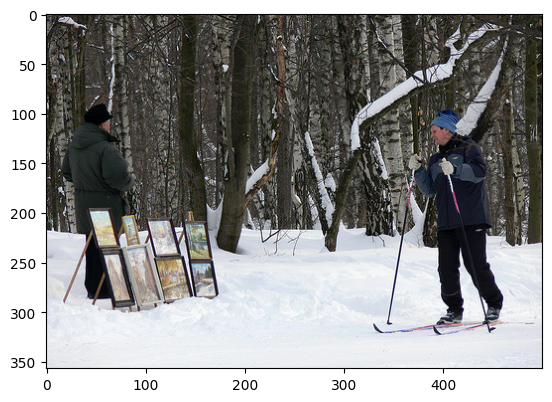

In [27]:
generate_caption("101669240_b2d3e7f17b.jpg")

---------------------Actual---------------------
startseq boy in blue shorts slides down slide into pool endseq
startseq boy in blue swimming trunks slides down yellow slide into wading pool with inflatable toys floating in the water endseq
startseq boy rides down slide into small backyard pool endseq
startseq boy sliding down slide into pool with colorful tubes endseq
startseq child is falling off slide onto colored balloons floating on pool of water endseq
--------------------Predicted--------------------
startseq boy rides down slide into pool with colorful tubes endseq


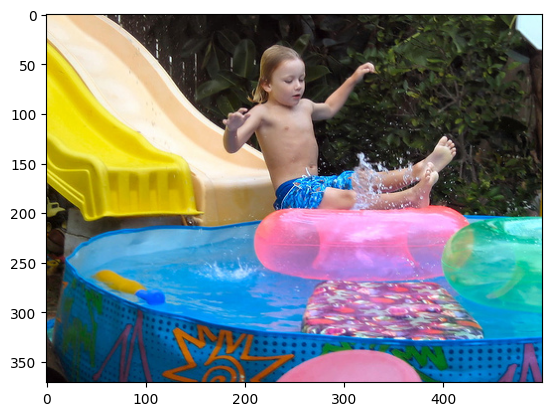

In [28]:
generate_caption("1077546505_a4f6c4daa9.jpg")

---------------------Actual---------------------
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
--------------------Predicted--------------------
startseq young girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq


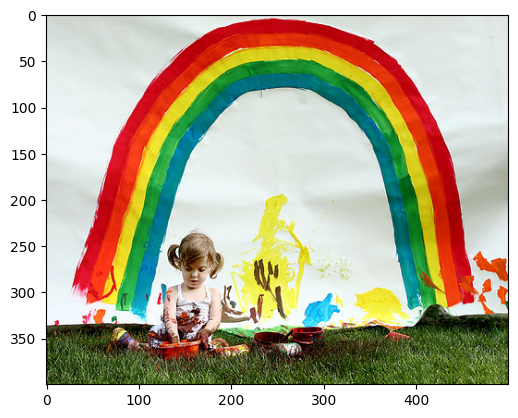

In [29]:
generate_caption("1002674143_1b742ab4b8.jpg")

---------------------Actual---------------------
startseq man is standing in front of skyscraper endseq
startseq man stands in front of skyscraper endseq
startseq man stands in front of very tall building endseq
startseq behind the man in red shirt stands large skyscraper endseq
startseq there is skyscraper in the distance with man walking in front of the camera endseq
--------------------Predicted--------------------
startseq man stands in front of skyscraper endseq


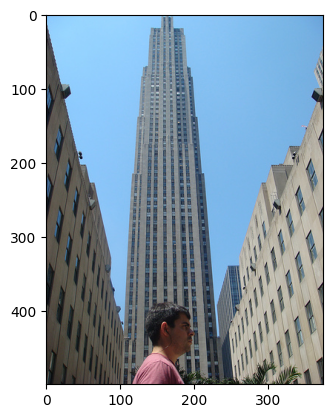

In [30]:
generate_caption("1032460886_4a598ed535.jpg")

---------------------Actual---------------------
startseq woman crouches near three dogs in field endseq
startseq three dogs are playing on grassy hill with blue sky endseq
startseq three dogs are standing in the grass and person is sitting next to them endseq
startseq three dogs on grassy hill endseq
startseq three dogs stand in grassy field while person kneels nearby endseq
--------------------Predicted--------------------
startseq three dogs stand in grassy field while the dogs kneels nearby endseq


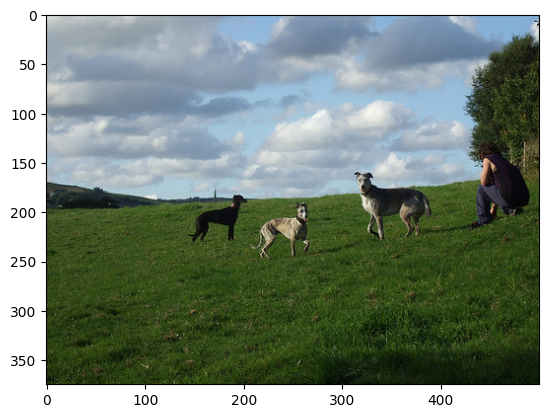

In [31]:
generate_caption("1032122270_ea6f0beedb.jpg")